In [34]:
import numpy as np
from scipy import stats
from statsmodels.stats.weightstats import DescrStatsW

In [ ]:
np.sqrt

In [2]:
(9.5 - 9.57)/(0.4/np.sqrt(160))

-2.2135943621178749

In [20]:
nd = stats.norm(0,1)
2.*(1. - nd.cdf(2.2135943621178749))

0.026856695507523787

In [28]:
nd.cdf(0)

0.5

Имеются данные о стоимости и размерах 53940 бриллиантов:

diamonds.txt
Отделите 25% случайных наблюдений в тестовую выборку с помощью функции sklearn.cross_validation.train_test_split (зафиксируйте random state = 1). На обучающей выборке настройте две регрессионные модели:

линейную регрессию с помощью LinearRegression без параметров
случайный лес с помощью RandomForestRegressor с random_state=1.
Какая из моделей лучше предсказывает цену бриллиантов? Сделайте предсказания на тестовой выборке, посчитайте модули отклонений предсказаний от истинных цен. Проверьте гипотезу об одинаковом среднем качестве предсказаний, вычислите достигаемый уровень значимости. Отвергается ли гипотеза об одинаковом качестве моделей против двусторонней альтернативы на уровне значимости α=0.05?

Не отвергается, p>α

Отвергается, p<α

In [1]:
import pandas as pd

In [11]:
df = pd.read_csv('diamonds.txt', delimiter = '\t')
df.head(3)

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31


In [12]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('price', axis = 'columns').values, df.price, test_size = 0.25, random_state = 1)

In [20]:
lin_estim = LinearRegression()
rfr_estim = RandomForestRegressor(random_state = 1)

In [21]:
lin_estim.fit(X_train, y_train)
rfr_estim.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=1,
           verbose=0, warm_start=False)

In [23]:
lin_pred = lin_estim.predict(X_test)
rfr_pred = rfr_estim.predict(X_test)

In [26]:
lin_err = np.abs(lin_pred - y_test)
rfr_err = np.abs(rfr_pred - y_test)

In [28]:
import matplotlib.pyplot as plt

In [31]:
stats.probplot(lin_err-rfr_err, plot = plt)

((array([-3.88388616, -3.66274206, -3.54151337, ...,  3.54151337,
          3.66274206,  3.88388616]),
  array([ -6376.57686053,  -5636.77396851,  -5523.53373191, ...,
           8839.29300989,  10992.2757726 ,  15105.14636008])),
 (716.89515879590158, 85.673517953195812, 0.91816947480550581))

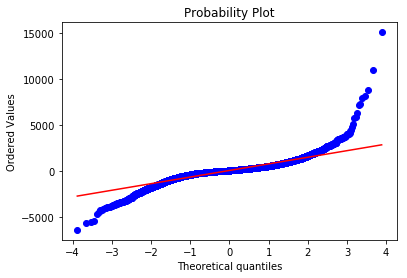

In [32]:
plt.show()

In [33]:
stats.ttest_rel(lin_err, rfr_err)

Ttest_relResult(statistic=12.74505677518302, pvalue=5.4286548181122138e-37)

In [36]:
DescrStatsW(lin_err - rfr_err).tconfint_mean()

(72.497265650119061, 98.849770256272961)